In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from rdkit import Chem
import plotly.graph_objs as go


In [4]:
results = pd.read_csv("data/results.tsv", sep='\t')

In [13]:
same_query_ref = results.loc[results['query'] == results['reference']]
same_query_ref.to_csv("data/same_query_ref.tsv", sep='\t', index=False)

(array([29., 30., 33., 31., 30., 25., 23., 25., 39., 40.]),
 array([0.0035218 , 0.09507018, 0.18661857, 0.27816696, 0.36971535,
        0.46126374, 0.55281213, 0.64436052, 0.73590891, 0.8274573 ,
        0.91900568]),
 <BarContainer object of 10 artists>)

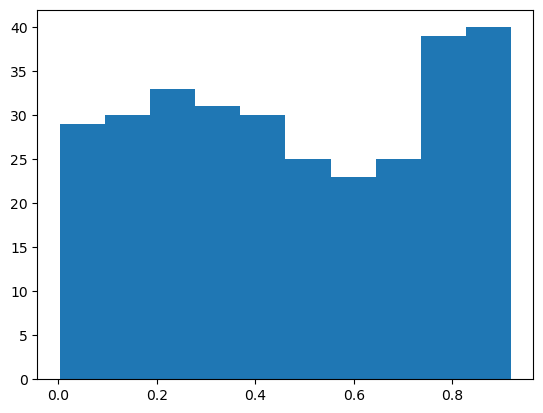

In [11]:
plt.hist(same_query_ref['CosineGreedy_score'], bins=10)

In [39]:
# Create a Histogram object
histogram = go.Histogram(x=same_query_ref['CosineGreedy_score'])

# Create a Layout object
layout = go.Layout(title='Histogram')

# Create a Figure object
figure = go.Figure(data=[histogram], layout=layout)

# Display the plot
figure.show()

AttributeError: module 'nbformat' has no attribute '__version__'

(array([ 9.,  1., 10.,  3., 10.,  6., 18.,  6., 11., 10., 15.,  6., 18.,
         5., 15.,  6.,  3., 13.,  1., 17.,  7., 11.,  2.,  6.,  2.,  4.,
         8.,  2.,  3.,  5.,  2.,  9.,  2.,  4.,  3.,  1.,  0.,  0.,  3.,
         0.,  3.,  2.,  2.,  0.,  3.,  2.,  2.,  1.,  2.,  3.,  1.,  2.,
         2.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,
         0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  1.,  0.,  1.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  2.  ,   3.47,   4.94,   6.41,   7.88,   9.35,  10.82,  12.29,
         13.76,  15.23,  16.7 ,  18.17,  19.64,  21.11,  22.58,  24.05,
         25.52,  26.99,  28.46,  29.93,  31.4 ,  32.87,  34.34,  35.81,
         37.28,  38.75,  40.22,  41.69,  43.16,  44.63,  46.1 ,  47.57,
         49.04,  50.51,  51.98,  53.45,  54.92,  56.39,  57.86,  59.33,
         60.8 ,  62.27,  63.74,  65.21,  66.68,  68.15,  69.62,  71.09,
  

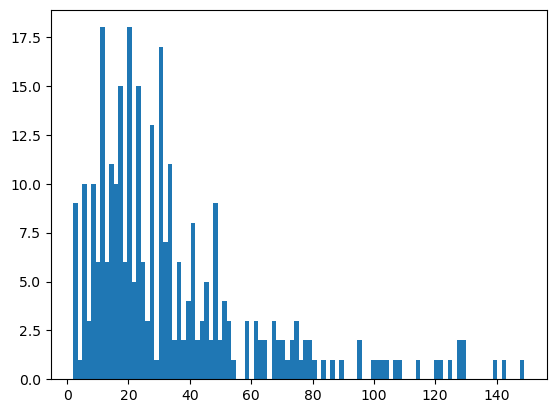

In [12]:
plt.hist(same_query_ref['CosineGreedy_matches'], bins=100)

In [17]:
molecules = Chem.SDMolSupplier("../data/RECETOX_GC-EI-MS_20201028.sdf")
class_names = pd.DataFrame({
    "class" : [m.GetProp("Class") for m in molecules],
    "name" : [m.GetProp("NAME") for m in molecules]
})
merged_df = pd.merge(same_query_ref, class_names, left_on='query', right_on='name')

In [34]:
def make_boxplot(grouped_df: pd.DataFrame, colname: str):
	#Create the plot with a width of 10 inches
	fig, ax = plt.subplots(figsize=(14, 5))

	# Create a list of DataFrames, one for each group
	grouped_dfs = [grouped_df.get_group(group) for group in grouped_df.groups]

	# Create a boxplot for each DataFrame
	ax.boxplot([df[colname] for df in grouped_dfs])

	labels = [f"{group} ({len(x)})" for group, x in grouped_df]
	# Set the x-axis tick labels and increase the distance between ticks to 0.5 inches
	ax.set_xticklabels(labels, rotation=90)
	ax.tick_params(axis='x', which='major', pad=0.5)

	# Set the x-axis label, y-axis label, and plot title
	ax.set_xlabel('Group')
	ax.set_ylabel(colname)
	ax.set_title('Boxplot of CosineGreedy_score by Group')

	# Show the plot
	plt.show()

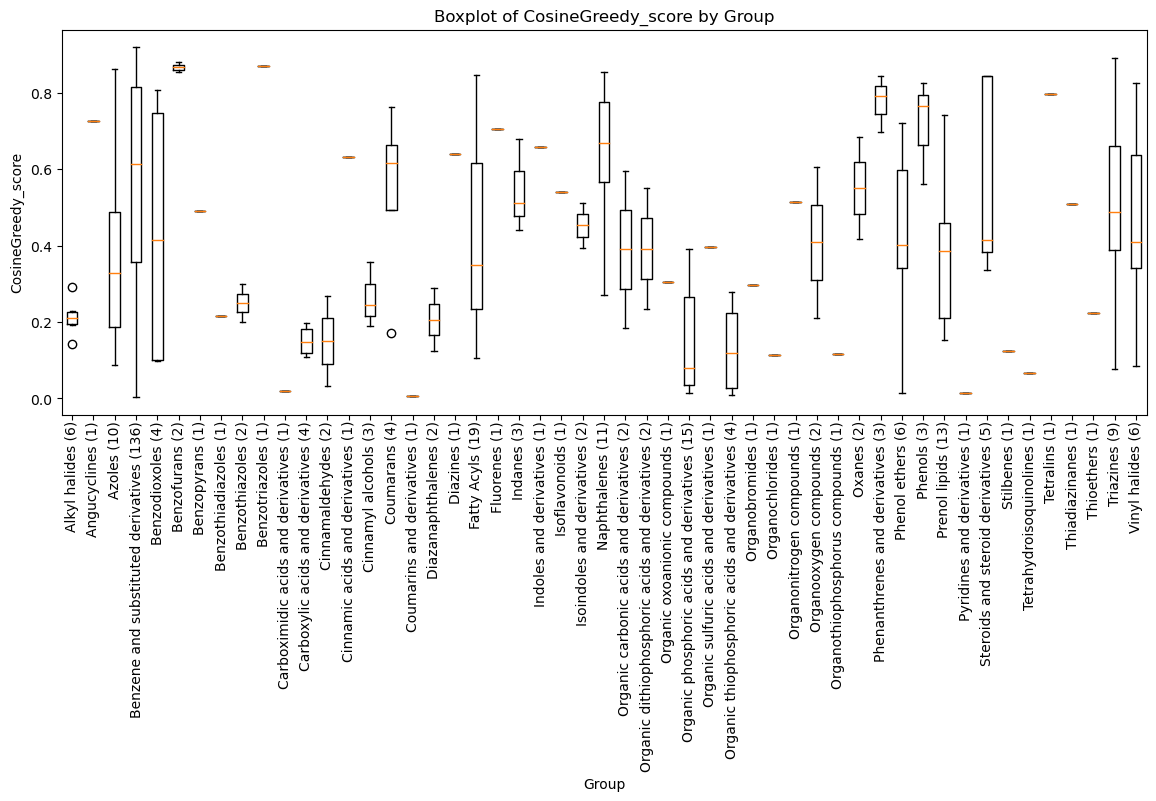

In [35]:
make_boxplot(grouped_df, 'CosineGreedy_score')

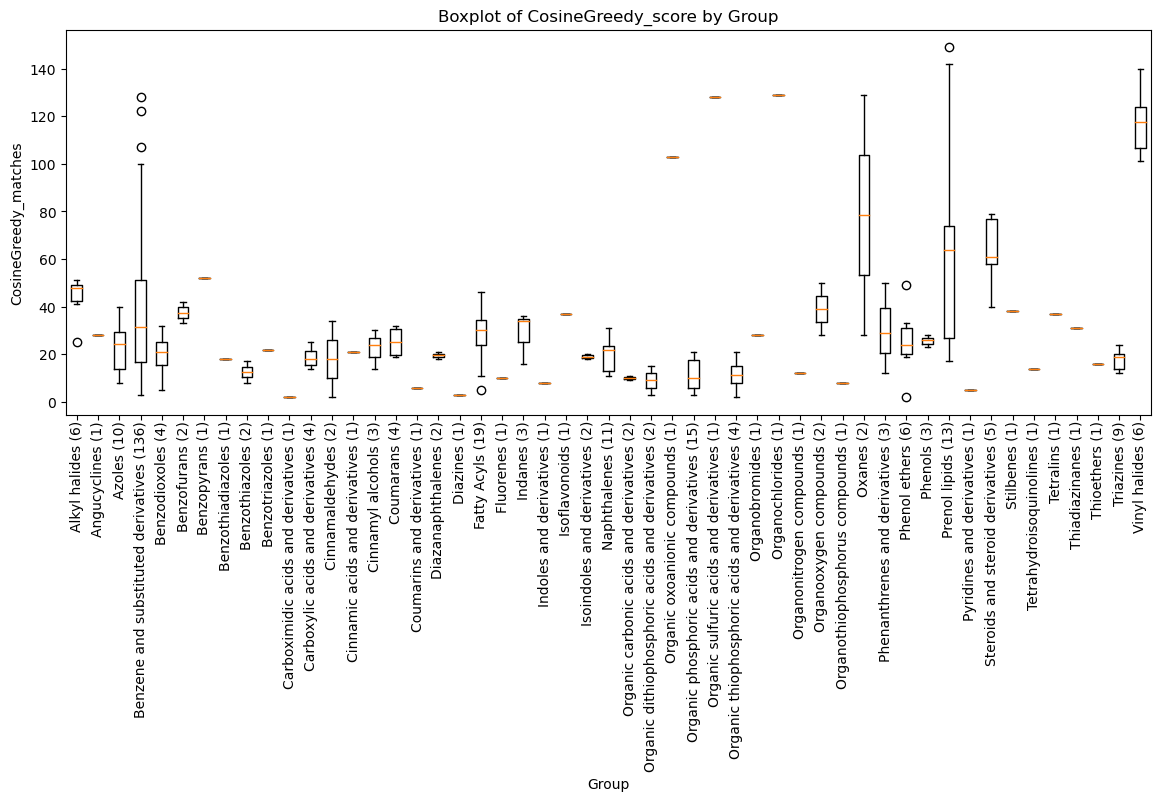

In [36]:
make_boxplot(grouped_df, 'CosineGreedy_matches')